# 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import FinanceDataReader as fdr

# 개별종목 일별 시세 로드

In [5]:
# 팬오션 : 028670
df = fdr.DataReader("028670", "2020", "2021")
df.shape

(248, 6)

# 20일간 종가의 이동평균

In [6]:
df["MA20"] =  df["Close"].rolling(20).mean()
df["MA20"]

Date
2020-01-02        NaN
2020-01-03        NaN
2020-01-06        NaN
2020-01-07        NaN
2020-01-08        NaN
               ...   
2020-12-23    4253.25
2020-12-24    4284.25
2020-12-28    4320.25
2020-12-29    4351.75
2020-12-30    4386.50
Name: MA20, Length: 248, dtype: float64

# 분산 / 표준편차

In [7]:
# 기술통계값
df["Close"].describe()

count     248.000000
mean     3718.145161
std       440.287203
min      2085.000000
25%      3452.500000
50%      3717.500000
75%      4026.250000
max      5020.000000
Name: Close, dtype: float64

In [8]:
# 분산
df["Close"].var()

193852.82094815202

In [9]:
# 표준편차
np.sqrt(df["Close"].var())

440.28720279852786

In [10]:
# 표준편차
df["Close"].std()

440.28720279852786

# 20일간 종가 이동평균의 표준편차

In [13]:
# 표준편차
df["stddev"] = df["Close"].rolling(20).std()
# 종가의 이동평균 + (표준편차 * 2)
df["UpperB"] = df["MA20"] + (df["stddev"] * 2)
# 종가의 이동평균 - (표준편차 * 2)
df["LowerB"] = df["MA20"] - (df["stddev"] * 2)

df.head()

,Open,High,Low,Close,Volume,Change,MA20,stddev,UpperB,LowerB
Date,,,,,,,,,,
2020-01-02,4530,4535,4440,4460,1079464,-0.018702,NaN,NaN,NaN,NaN
2020-01-03,4460,4555,4440,4500,921814,0.008969,NaN,NaN,NaN,NaN
2020-01-06,4450,4450,4320,4380,1140640,-0.026667,NaN,NaN,NaN,NaN
2020-01-07,4425,4430,4355,4410,1002069,0.006849,NaN,NaN,NaN,NaN
2020-01-08,4340,4395,4200,4250,2046417,-0.036281,NaN,NaN,NaN,NaN


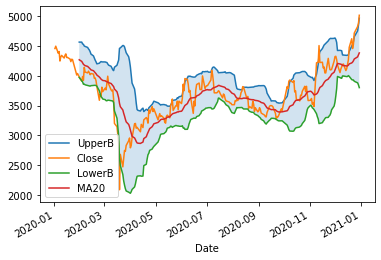

In [18]:
# 시각화
df[["UpperB", "Close", "LowerB", "MA20"]].plot()

# 볼린저밴드
plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)

# pyplot 이용하여 볼린저밴드 시각화

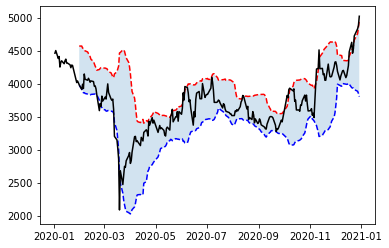

In [22]:
plt.plot(df.index, df.UpperB, "r--")
plt.plot(df.index, df.LowerB, "b--")
plt.plot(df.index, df.Close, "k")

# 색상 칠
plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)

# %밴드

- 주가의 상대적인 위치 파악 가능

In [24]:
df["PercentB"] = (df["Close"] - df["LowerB"]) / (df["UpperB"] - df["LowerB"])

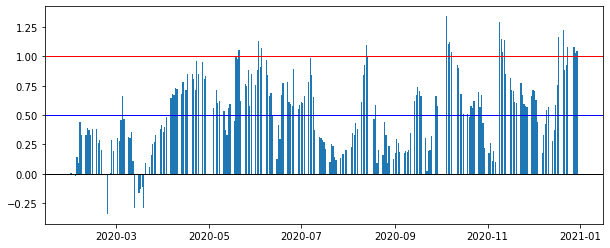

In [37]:
plt.figure(figsize=(10,4))
plt.bar(df.index , df["PercentB"])
plt.axhline(0, c="k", lw=1)
plt.axhline(1, c="r", lw=1)
plt.axhline(0.5, c="b", lw=1)

# 밴드폭

- 밴드폭을 통해 주가 상승 하락은 알 수 없지만 추세 전환 신호로 활용 가능

In [40]:
df["bandwidth"] = (df["UpperB"] - df["LowerB"]) / df["MA20"]

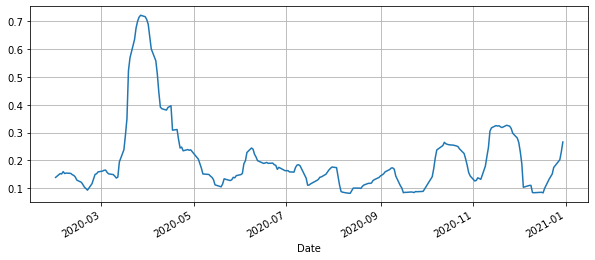

In [42]:
df["bandwidth"].plot(figsize=(10,4), grid=True)

In [43]:
df.tail()

,Open,High,Low,Close,Volume,Change,MA20,stddev,UpperB,LowerB,PercentB,bandwidth
Date,,,,,,,,,,,,
2020-12-23,4520,4770,4365,4530,11524317,0.015695,4253.25,160.847059,4574.944118,3931.555882,0.930145,0.151270
2020-12-24,4610,4890,4550,4720,16312399,0.041943,4284.25,187.323777,4658.897554,3909.602446,1.081547,0.174895
2020-12-28,4805,4995,4770,4830,13472935,0.023305,4320.25,218.640988,4757.531976,3882.968024,1.082862,0.202434
2020-12-29,4960,5070,4830,4880,7257595,0.010352,4351.75,250.978480,4853.706960,3849.793040,1.026191,0.230692
2020-12-30,4960,5090,4840,5020,6271296,0.028689,4386.50,291.863793,4970.227586,3802.772414,1.042633,0.266147


# 볼린저 밴드 함수

In [75]:
def show_bband(df, n=20, k=2):
    """
    볼린저밴드
    N기간 동안의 이동평균(MA)
    """
    
    # 그래프 스타일
    plt.style.use("seaborn")
    # 20일간 종가의 이동평균
    df["MA20"] = df["Close"].rolling(20).mean()
    # 20일간 종가의 표준편차
    df["stddev"] = df["Close"].rolling(20).std()
    # 종가의 이동평균 + (표준편차*2)
    df["UpperB"] = df["MA20"] + (df["stddev"] * 2 )
    # 종가의 이동평균 - (표준편차*2)
    df["LowerB"] = df["MA20"] - (df["stddev"] * 2 )  
    df = df[19:].copy()    
    
    # 시각화
    plt.figure(figsize=(10,4))
    plt.plot(df.index, df.Close, "k", label="Close")
    plt.plot(df.index, df.MA20, label="MA20")
    plt.plot(df.index, df.UpperB, "r--" ,label="UpeerB")
    plt.plot(df.index, df.LowerB, "b--", label="LowerB")
    plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)
    # legend
    plt.legend(loc="best")

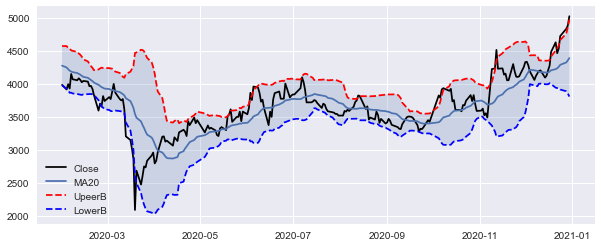

In [76]:
show_bband(df)

## 볼린저 밴드 함수로 해외 주가 시각화

In [77]:
amd = fdr.DataReader("AMD", "2020", "2021")

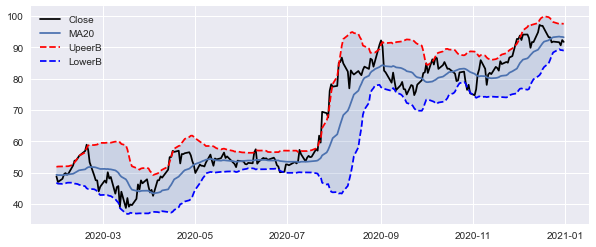

In [78]:
show_bband(amd)